In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification


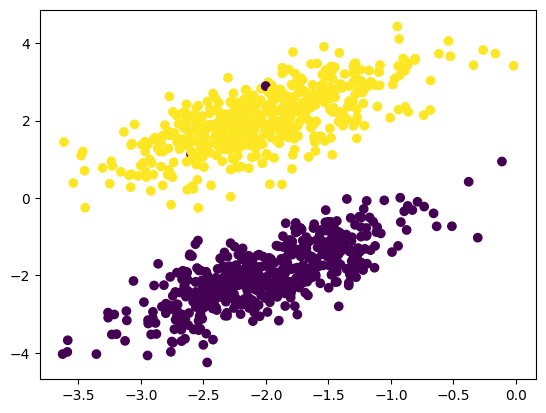

In [2]:
X, y = make_classification(n_samples=1000,
                  n_features=2, 
                  n_classes=2,
                  n_clusters_per_class=1,
                  n_redundant=0,
                  class_sep=2.0, 
                  random_state=12)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
class Perceptron:
    def __init__(self, n_features: int = 2, n_iter=5):
        self.weights = np.random.randn(n_features, 1)
        self.bias = np.zeros((1, 1))
        self.n_iter = n_iter
        
        self.best_weights = None
        self.best_bias = None
        
        self.lowest_loss = np.inf
        
    def thershold(self, z):
        return np.where(z > 0.0, 1.0, 0.0)
    
    def forward(self, x):
        return (x @ self.weights) + self.bias
    
    def predict(self, x):
        z = self.forward(x)
        y_hat = self.thershold(z)
        return y_hat.ravel()
    
    def fit(self, x, y):
        plot_decision_regions(X, y, clf=self)
        plt.show()
        plt.clf()
        for iter in range(self.n_iter):
            y_hat = self.predict(x)
            loss = y - y_hat
            print(f"Iteration {iter + 1}, Loss : {sum(np.abs(loss)):.4}")
            if sum(np.abs(loss)) <= self.lowest_loss:
                self.best_weights = np.copy(self.weights)
                self.best_bias = np.copy(self.bias)
                self.lowest_loss = sum(np.abs(loss)) 
            
            w_diff = x.T @ loss[..., np.newaxis]
            b_diff = np.sum(loss[..., np.newaxis], axis=0)
            
            self.weights = self.weights + w_diff
            self.bias = self.bias + b_diff
            
        self.weights = self.best_weights
        self.bias = self.best_bias
        print("=" * 50)
        print(f"best Loss: {self.lowest_loss} ")
        plot_decision_regions(X, y, clf=self)
            
            
        

        
    

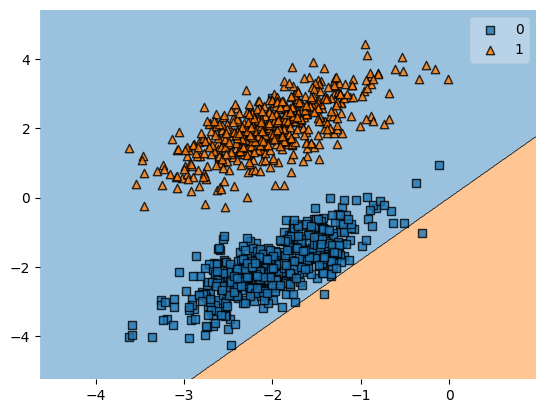

Iteration 1, Loss : 500.0
Iteration 2, Loss : 405.0
Iteration 3, Loss : 9.0
Iteration 4, Loss : 9.0
Iteration 5, Loss : 9.0
Iteration 6, Loss : 9.0
Iteration 7, Loss : 9.0
Iteration 8, Loss : 9.0
Iteration 9, Loss : 9.0
Iteration 10, Loss : 9.0
Iteration 11, Loss : 9.0
Iteration 12, Loss : 9.0
Iteration 13, Loss : 10.0
Iteration 14, Loss : 10.0
Iteration 15, Loss : 10.0
Iteration 16, Loss : 10.0
Iteration 17, Loss : 9.0
Iteration 18, Loss : 9.0
Iteration 19, Loss : 9.0
Iteration 20, Loss : 9.0
Iteration 21, Loss : 9.0
Iteration 22, Loss : 9.0
Iteration 23, Loss : 8.0
Iteration 24, Loss : 9.0
Iteration 25, Loss : 9.0
Iteration 26, Loss : 9.0
Iteration 27, Loss : 8.0
Iteration 28, Loss : 9.0
Iteration 29, Loss : 9.0
Iteration 30, Loss : 9.0
Iteration 31, Loss : 9.0
Iteration 32, Loss : 8.0
Iteration 33, Loss : 9.0
Iteration 34, Loss : 9.0
Iteration 35, Loss : 9.0
Iteration 36, Loss : 9.0
Iteration 37, Loss : 8.0
Iteration 38, Loss : 9.0
Iteration 39, Loss : 9.0
Iteration 40, Loss : 9.0
I

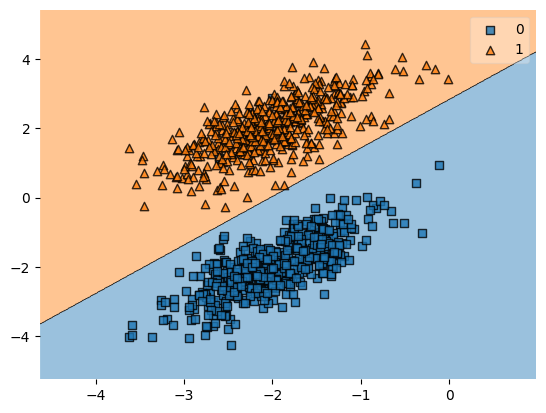

In [4]:
per = Perceptron(n_iter=1000)
per.fit(x=X, y=y)

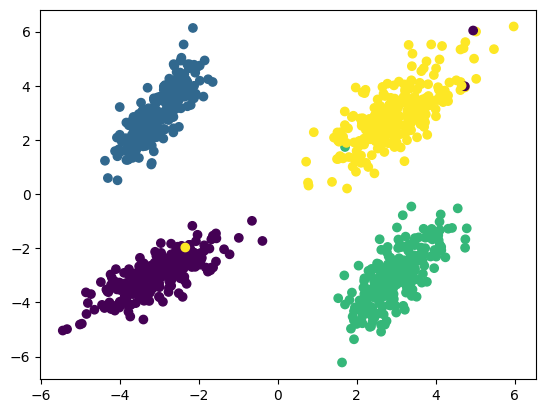

In [5]:
X, y = make_classification(n_samples=1000,
                  n_features=2, 
                  n_classes=4,
                  n_clusters_per_class=1,
                  n_redundant=0,
                  class_sep=3.0, 
                  random_state=12)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
class MultiClassPerceptron:
    def __init__(self, n_features: int = 2, n_classes: int = 4, n_iter=100):
        self.weights = np.random.randn(n_features, n_classes)
        self.bias = np.zeros((1, n_classes))
        self.n_iter = n_iter
        self.n_classes = n_classes
        
        self.best_weights = None
        self.best_bias = None
        
        self.lowest_loss = np.inf
        
    def argmax(self, z):
        return np.argmax(z, axis=-1)
    
    def one_hot(self, y):
        one_hot = np.zeros((y.size, self.n_classes))
        one_hot[np.arange(y.size), y] = 1
        return one_hot
    
    def forward(self, x):
        return (x @ self.weights) + self.bias
    
    def predict(self, x):
        z = self.forward(x)
        y_hat = self.argmax(z)
        return y_hat
    
    def fit(self, x, y):
        plot_decision_regions(X, y, clf=self)
        plt.show()
        plt.clf()
        for iter in range(self.n_iter):
            
            y_hat = self.predict(x)
            loss = self.one_hot(y) - self.one_hot(y_hat)
            print(f"Iteration {iter + 1}, Loss : {np.sum(np.abs(loss)):.4}")
            
            if np.sum(np.abs(loss)) <= self.lowest_loss:
                self.best_weights = np.copy(self.weights)
                self.best_bias = np.copy(self.bias)
                self.lowest_loss = np.sum(np.abs(loss)) 
            
            w_diff = x.T @ loss
            b_diff = np.sum(loss, axis=0, keepdims=True)
            
            self.weights = self.weights + w_diff
            self.bias = self.bias + b_diff
            
        self.weights = self.best_weights
        self.bias = self.best_bias
        print("=" * 50)
        print(f"best Loss: {self.lowest_loss} ")
        plot_decision_regions(X, y, clf=self)
            
            
        


d:\Users\AlianWare\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


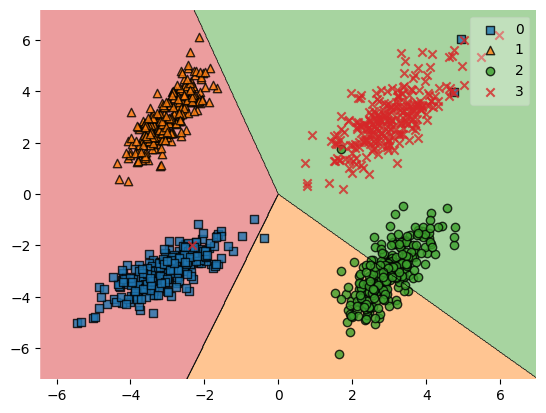

Iteration 1, Loss : 1.764e+03
Iteration 2, Loss : 654.0
Iteration 3, Loss : 52.0
Iteration 4, Loss : 28.0
Iteration 5, Loss : 22.0
Iteration 6, Loss : 20.0
Iteration 7, Loss : 14.0
Iteration 8, Loss : 14.0
Iteration 9, Loss : 14.0
Iteration 10, Loss : 14.0
Iteration 11, Loss : 12.0
Iteration 12, Loss : 12.0
Iteration 13, Loss : 10.0
Iteration 14, Loss : 10.0
Iteration 15, Loss : 10.0
Iteration 16, Loss : 8.0
Iteration 17, Loss : 8.0
Iteration 18, Loss : 8.0
Iteration 19, Loss : 8.0
Iteration 20, Loss : 8.0
Iteration 21, Loss : 8.0
Iteration 22, Loss : 8.0
Iteration 23, Loss : 8.0
Iteration 24, Loss : 8.0
Iteration 25, Loss : 8.0
Iteration 26, Loss : 8.0
Iteration 27, Loss : 8.0
Iteration 28, Loss : 8.0
Iteration 29, Loss : 8.0
Iteration 30, Loss : 8.0
Iteration 31, Loss : 8.0
Iteration 32, Loss : 8.0
Iteration 33, Loss : 8.0
Iteration 34, Loss : 10.0
Iteration 35, Loss : 10.0
Iteration 36, Loss : 10.0
Iteration 37, Loss : 10.0
Iteration 38, Loss : 10.0
Iteration 39, Loss : 12.0
Iterati

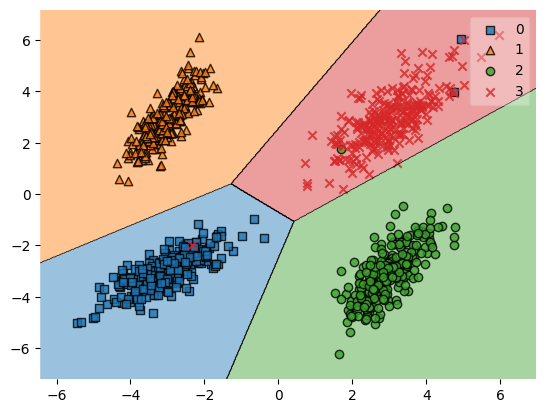

In [7]:
per = MultiClassPerceptron(n_iter=1000)
per.fit(x=X, y=y)